In [54]:
from pymongo import MongoClient
from bson import ObjectId
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

## Connect
Connect the MongoDB Database, and create the collection including the schema validator.

In [55]:
client = MongoClient('mongodb://localhost:27017')
dbname = 'recruitment_analytics'

if dbname in client.list_database_names():
  client.drop_database(dbname)

db = client['recruitment_analytics']

collection = db.create_collection('application', validator={
    '$jsonSchema': {
        'bsonType': 'object',
        'additionalProperties': False,
        'required': ['_id', 'state', 'employee', 'candidate', 'site', 'vacancy'],
        'description': 'Object representing an application to a job.',
        'properties': {
          
            "_id": { "bsonType": "objectId" },

            'state': {
                'enum': ['Submitted', 'Under Review', 'Interview Scheduled', 'Rejected', 'Offer Extended'],
                'description': 'The current state of the application.'
            },
            
            'employee': {
                'bsonType': 'object',
                'required': ['_id', 'first_name', 'last_name', 'location'],
                'description': 'The employee of the recruitment company responsible for the application process.',
                'properties': {         
                  
                    "_id": { "bsonType": "objectId" },
                    'first_name': {
                        'bsonType': 'string',
                        'description': 'The first name of the employee.'
                    },
                    'last_name': {
                        'bsonType': 'string',
                        'description': 'The last name of the employee.'
                    },
                    'location': {
                        'bsonType': 'string',
                        'description': 'The physical location of the recruitment company office where the employee is working.'
                    }
                }
            },

            'candidate': {
                'bsonType': 'object',
                'required': ['_id', 'first_name', 'last_name', 'origin_name', 'origin_iso_3166_2'],
                'description': 'The employee of the recruitment company responsible for the application process.',
                'properties': {         
                  
                    "_id": { "bsonType": "objectId" },
                    'first_name': {
                        'bsonType': 'string',
                        'description': 'The first name of the candidate.'
                    },
                    'last_name': {
                        'bsonType': 'string',
                        'description': 'The last name of the candidate.'
                    },
                    'origin_name': {
                        'bsonType': 'string',
                        'description': 'The name of the candidates origin region.'
                    },
                    'origin_iso_3166_2': {
                        'bsonType': 'string',
                        'description': 'The ISO 3166-2 code of the candidates origin region.'
                    }
                }
            },

            'site': {
                'bsonType': 'object',
                'required': [
                  '_id', 
                  'iso_3166_2_code', 
                  'region_name', 
                  'iso_3166_1_code', 
                  'country_name', 
                  'company_name', 
                  'business_type'
                ],
                'description': 'Information about the branch of the company where the application is received.',
                'properties': {         
                  
                    "_id": { "bsonType": "objectId" },
                    'name': {
                        'bsonType': 'string',
                        'description': 'The name of the company branch.'
                    },
                    'iso_3166_2_code': {
                        'bsonType': 'string',
                        'description': 'The ISO 3166-2 code of the countries subdivision.'
                    },
                    'region_name': {
                        'bsonType': 'string',
                        'description': 'The name of the region in English.'
                    },
                    'iso_3166_1_code': {
                        'bsonType': 'string',
                        'description': 'The ISO 3166 Code of the country.'
                    },
                    'country_name': {
                        'bsonType': 'string',
                        'description': 'The name of the country in English.'
                    },
                    'company_name': {
                        'bsonType': 'string',
                        'description': 'The name of the company who posted the job advertisement.'
                    },
                    'business_type': {
                        'enum': ['Retail', 'Technology', 'Hospitality', 'Finance', 'Healthcare'],
                        'description': 'The type of business where the company is active.'
                    }
                }
            },

            'vacancy': {
                'bsonType': 'object',
                'required': [
                  '_id', 
                  'employment_fraction', 
                  'salary', 
                  'work_from_home_fraction', 
                  'required_education',
                  'job_group',
                  'source',
                  'creation_date',
                  'title'
                ],
                'description': 'The vacancy to which the candidate applies',
                'properties': { 
                  
                    "_id": { "bsonType": "objectId" },
                    'employment_fraction': {
                      'enum': ['0-20', '21-40', '41-60', '61-80', '81-100'],
                      'description': 'The employment fraction in percent.'
                    },
                    'salary': {
                      'enum': ['0-40000', '40001-60000', '60001-80000', '80001-100000', '100001-120000', '120001-140000', '140001-160000', '160001-180000'],
                      'description': 'The salary fraction.'
                    },
                    'work_from_home_fraction': {
                      'enum': ['0', '1-20', '21-40', '41-60', '61-80', '81-100'],
                      'description': 'The fraction of permitted remote work.'
                    },
                    'required_education': {
                        'enum': ['High School Diploma', 'Bachelor\'s Degree', 'Master\'s Degree', 'Ph.D.', 'Professional Certification'],
                        'description': 'The physical location of the recruitment company office where the employee is working.'
                    },
                    'job_group': {
                      'enum': ['Sales', 'Marketing', 'Engineering', 'Finance', 'Operations'],
                      'description': 'The internal categorization of the job advertisement'
                    },
                    'source': {
                      'enum': ['Company Website', 'LinkedIn', 'Indeed', 'Glassdoor', 'CareerBuilder'],
                      'description': 'The source where the job advertisement was originally found'
                    },
                    'creation_date': {
                        'bsonType': 'date',
                        'description': 'The date of when the advertisement has been created by the company.'
                    },
                    'title': {
                        'bsonType': 'string',
                        'description': 'The Job Title to which the candidate applies.'
                    }
                }
            }
        }
    }
})

['admin', 'config', 'local', 'recruitment_analytics']


## Insert the data
Insert the data into the database:

In [56]:
data_to_insert = [
    { 
		"_id": ObjectId(),
		'state': 'Submitted',            
		'employee': { "_id": ObjectId(), 'first_name': 'John', 'last_name': 'Doe', 'location': 'California'	},
		'candidate': { "_id": ObjectId(), 'first_name': 'Olivia', 'last_name': 'Wilson', 'origin_name': 'California', 'origin_iso_3166_2': 'US-CA' },
		'site': {			  
			"_id": ObjectId(),
			'name': 'San Francisco Office',
			'iso_3166_2_code': 'US-CA',
			'region_name': 'California',
			'iso_3166_1_code': 'US',
			'country_name': 'United States',
			'company_name': 'Acme Corporation',
			'business_type': 'Retail'
		},
		'vacancy': {               
			"_id": ObjectId(),
			'employment_fraction': '61-80',
			'salary': '80001-100000',
			'work_from_home_fraction': '61-80',
			'required_education': 'Bachelor\'s Degree',
			'job_group': 'Engineering',
			'source': 'Company Website',
			'creation_date': datetime.fromisoformat('2023-03-10T08:45:23'), 
			'title': 'Senior Data Analyst'
		}
	},
    { 
		"_id": ObjectId(),
		'state': 'Submitted',            
		'employee': { "_id": ObjectId(), 'first_name': 'John', 'last_name': 'Doe', 'location': 'California'	},
		'candidate': { "_id": ObjectId(), 'first_name': 'James', 'last_name': 'Brown', 'origin_name': 'London', 'origin_iso_3166_2': 'GB-ENG' },
		'site': {			  
			"_id": ObjectId(),
			'name': 'London Office',
			'iso_3166_2_code': 'GB-ENG',
			'region_name': 'London',
			'iso_3166_1_code': 'GB',
			'country_name': 'United Kingdom',
			'company_name': 'InnovateTech Solutions',
			'business_type': 'Technology'
		},
		'vacancy': {               
			"_id": ObjectId(),
			'employment_fraction': '41-60',
			'salary': '60001-80000',
			'work_from_home_fraction': '41-60',
			'required_education': 'High School Diploma',
			'job_group': 'Marketing',
			'source': 'LinkedIn',
			'creation_date': datetime.fromisoformat('2023-09-21T15:12:06'),
			'title': 'Marketing Coordinator'
		}
	},
    { 
		"_id": ObjectId(),
		'state': 'Under Review',            
		'employee': { "_id": ObjectId(), 'first_name': 'Emily', 'last_name': 'Smith', 'location': 'London'	},
		'candidate': { "_id": ObjectId(), 'first_name': 'James', 'last_name': 'Brown', 'origin_name': 'London', 'origin_iso_3166_2': 'GB-ENG' },
		'site': {			  
			"_id": ObjectId(),
			'name': 'Toronto Office',
			'iso_3166_2_code': 'CA-ON',
			'region_name': 'Ontario',
			'iso_3166_1_code': 'CA',
			'country_name': 'Canada',
			'company_name': 'Grand Hotel Group',
			'business_type': 'Hospitality'
		},
		'vacancy': {               
			"_id": ObjectId(),
			'employment_fraction': '81-100',
			'salary': '120001-140000',
			'work_from_home_fraction': '21-40',
			'required_education': 'Master\'s Degree',
			'job_group': 'Engineering',
			'source': 'Indeed',
			'creation_date': datetime.fromisoformat('2023-07-04T12:30:59'),
			'title': 'Software Engineer'
		}
	},
    { 
		"_id": ObjectId(),
		'state': 'Interview Scheduled',            
		'employee': { "_id": ObjectId(), 'first_name': 'Emily', 'last_name': 'Smith', 'location': 'London'	},
		'candidate': { "_id": ObjectId(), 'first_name': 'Isabella', 'last_name': 'Taylor', 'origin_name': 'Ontario', 'origin_iso_3166_2': 'CA-ON' },
		'site': {			  
			"_id": ObjectId(),
			'name': 'Sydney Office',
			'iso_3166_2_code': 'AU-NSW',
			'region_name': 'New South Wales',
			'iso_3166_1_code': 'AU',
			'country_name': 'Australia',
			'company_name': 'Financial Services Inc.',
			'business_type': 'Finance'
		},
		'vacancy': {               
			"_id": ObjectId(),
			'employment_fraction': '81-100',
			'salary': '100001-120000',
			'work_from_home_fraction': '41-60',
			'required_education': 'Professional Certification',
			'job_group': 'Finance',
			'source': 'Glassdoor',
			'creation_date': datetime.fromisoformat('2023-05-18T19:27:41'), 
			'title': 'Financial Analyst'
		}
	},
    { 
		"_id": ObjectId(),
		'state': 'Offer Extended',            
		'employee': { "_id": ObjectId(), 'first_name': 'Sophia', 'last_name': 'Anderson', 'location': 'New South Wales'	},
		'candidate': { "_id": ObjectId(), 'first_name': 'Benjamin', 'last_name': 'Lee', 'origin_name': 'New South Wales', 'origin_iso_3166_2': 'AU-NSW' },
		'site': {			  
			"_id": ObjectId(),
			'name': 'Sydney Office',
			'iso_3166_2_code': 'AU-NSW',
			'region_name': 'New South Wales',
			'iso_3166_1_code': 'AU',
			'country_name': 'Australia',
			'company_name': 'Financial Services Inc.',
			'business_type': 'Finance'
		},
		'vacancy': {               
			"_id": ObjectId(),
			'employment_fraction': '81-100',
			'salary': '140001-160000',
			'work_from_home_fraction': '61-80',
			'required_education': 'Ph.D.',
			'job_group': 'Operations',
			'source': 'CareerBuilder',
			'creation_date': datetime.fromisoformat('2023-01-29T10:16:55'),
			'title': 'Human Resources Manager'
		}
	}
]

collection.insert_many(data_to_insert)

## Queries
Count all applications by region and country.

In [57]:
# Define the aggregation pipeline query
pipeline = [
    {
        '$group': {
            '_id': {
                'country': '$site.country_name',
                'region': '$site.region_name'
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$project': {
            '_id': 0,
            'country_name': '$_id.country',
            'region_name': '$_id.region',
            'application_count': '$count'
        }
    },
    {
        '$sort': {'application_count': -1}
    }
]

# Execute the aggregation query
result = collection.aggregate(pipeline)

# Collect the query result documents
documents = list(result)

# Create a Pandas DataFrame from the documents
df = pd.DataFrame(documents)

# Print the DataFrame
df

,country_name,region_name,application_count
0,Australia,New South Wales,2
1,United Kingdom,London,1
2,Canada,Ontario,1
3,United States,California,1


Count all applications by job group:

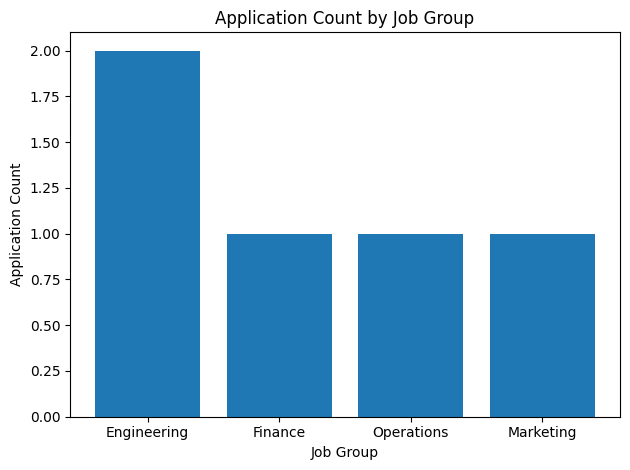

In [58]:
# Define the aggregation pipeline query
pipeline = [
    {
        '$group': {
            '_id': {
                'job_group': '$vacancy.job_group',
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$project': {
            '_id': 0,
            'job_group': '$_id.job_group',
            'application_count': '$count'
        }
    },
    {
        '$sort': {'application_count': -1}
    }
]


# Execute the aggregation query
result = collection.aggregate(pipeline)

# Collect the query result documents
documents = list(result)

# Create a Pandas DataFrame from the documents
df = pd.DataFrame(documents)

# Plot the bar plot
plt.bar(df['job_group'], df['application_count'])
plt.xlabel('Job Group')
plt.ylabel('Application Count')
plt.title('Application Count by Job Group')
plt.tight_layout()
plt.show()

# Close the MongoDB connection
client.close()